In [46]:
%pip install -r requirements.txt --upgrade
%pip install mido

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


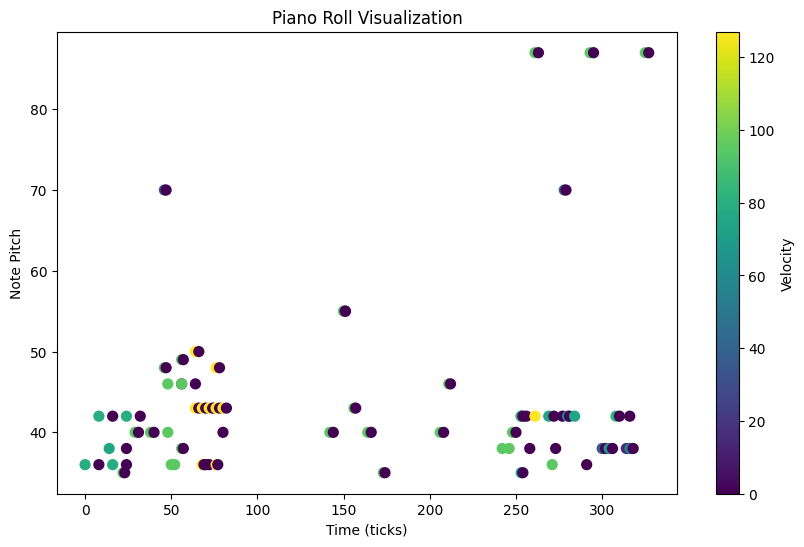

In [47]:
import mido
import matplotlib.pyplot as plt
import numpy as np

# Load midi file
mid = mido.MidiFile('output/model_output.mid')

# Lists to store data
times = []
pitches = []
velocities = []
event_types = []

time_so_far = 0
for track in mid.tracks:
    for msg in track:
        time_so_far += msg.time
        if msg.type == 'note_on':
            times.append(time_so_far)
            pitches.append(msg.note)
            velocities.append(msg.velocity)
            event_types.append('note_on')
        elif msg.type == 'note_off':
            times.append(time_so_far)
            pitches.append(msg.note)
            velocities.append(0)  # Velocity is 0 for note off
            event_types.append('note_off')

# Create a piano roll plot
plt.figure(figsize=(10, 6))
plt.scatter(times, pitches, c=velocities, cmap='viridis', s=50)
plt.xlabel('Time (ticks)')
plt.ylabel('Note Pitch')
plt.title('Piano Roll Visualization')
plt.colorbar(label='Velocity')
plt.show()

35
87


<Figure size 1000x600 with 0 Axes>

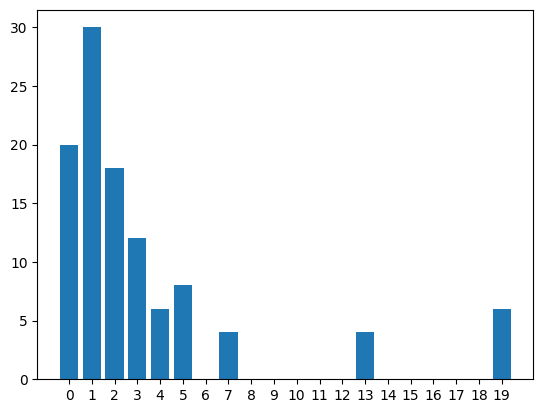

In [48]:
print(min(pitches))
print(max(pitches))

bins = 20
p = map(lambda x: x / min(pitches) / bins, pitches)
counts, _ = np.histogram(list(p), bins=bins)

# Create a piano roll plot
plt.figure(figsize=(10, 6))
# plt.scatter(times, pitches, c=velocities, cmap='viridis', s=50)
# plt.plot(pitches)
# plt.plot(velocities)

fig, ax = plt.subplots()
x_labels = [f"{i}" for i in range(bins)]
ax.bar(x_labels, counts)

# plt.xlabel('Time (ticks)')
# plt.ylabel('Note Pitch')
# plt.title('Piano Roll Visualization')
# plt.colorbar(label='Velocity')
plt.show()
